In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,auc

In [37]:
df = pd.read_csv('SMSSpamCollection',delimiter='\t',header=None)
df

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [38]:
xtrain,xtest,ytrain,ytest = train_test_split(df.iloc[:,1],df.iloc[:,0],random_state = 50)

In [39]:
vectorizer = TfidfVectorizer() 
xtrain = vectorizer.fit_transform(xtrain)
xtest = vectorizer.transform(xtest)
print(xtrain.shape)
print(xtest.shape)

(4179, 7380)
(1393, 7380)


In [40]:
classifier = LogisticRegression()
classifier.fit(xtrain,ytrain)

LogisticRegression()

In [41]:
prediction = classifier.predict(xtest)
print(prediction[:5])

['spam' 'ham' 'ham' 'ham' 'spam']


In [42]:
predict = classifier.predict_proba(xtest)

In [43]:
fpr,tpr,threshold = roc_curve(ytest,predict[:,1],pos_label='spam')

In [44]:
print("FPR -->\n",fpr)

FPR -->
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.21692687e-04
 8.21692687e-04 1.64338537e-03 1.64338537e-03 1.64338537e-03
 1.64338537e-03 1.64338537e-03 1.64338537e-03 2.46507806e-03
 2.46507806e-03 3.28677075e-03 3.28677075e-03 5.75184881e-03
 6.57354150e-03 6.57354150e-03 8.21692687e-03 8.21692687e-03
 8.21692687e-03 9.86031224e-03 9.86031224e-03 1.15036976e-02
 1.15036976e-02 1.47904684e-02 1.47904684e-02 1.56121611e-02
 1.72555464e-02 1.13393591e-01 1.16680362e-01 1.42152835e-01
 1.43796220e-01 1.61873459e-01 1.65160230e-01 2.38290879e-01
 2.39934265e-01 2.72801972e-01 2.74445357e-01 2.76088743e-01
 2.76088743e-01 3.48397699e-01 3.50041085e-01 3.53327855e-01
 3.53327855e-01 4.24815119e-01 4.27280197e-01 4.85620378e-01
 4.87263763e-01 5.07806081e-01 5.12736237e-01 5.43138866e-01
 5.43138866e-01 6.43385374e-01 6.45028759e-01 6.68857847e-01
 6.70501233e-01

In [45]:
print("TPR -->\n",tpr)

TPR -->
 [0.         0.00568182 0.0625     0.07386364 0.14772727 0.15909091
 0.26704545 0.27840909 0.50568182 0.51704545 0.60795455 0.60795455
 0.78977273 0.78977273 0.80681818 0.81818182 0.82954545 0.84090909
 0.88068182 0.88068182 0.89204545 0.89204545 0.90340909 0.90340909
 0.90340909 0.90909091 0.90909091 0.92045455 0.92613636 0.92613636
 0.9375     0.9375     0.97159091 0.97159091 0.97727273 0.97727273
 0.97727273 0.97727273 0.97727273 0.97727273 0.97727273 0.97727273
 0.97727273 0.97727273 0.97727273 0.97727273 0.97727273 0.97727273
 0.98295455 0.98295455 0.98295455 0.98295455 0.98863636 0.98863636
 0.98863636 0.98863636 0.98863636 0.98863636 0.98863636 0.98863636
 0.99431818 0.99431818 0.99431818 0.99431818 0.99431818 0.99431818
 0.99431818 0.99431818 0.99431818 0.99431818 0.99431818 0.99431818
 0.99431818 0.99431818 1.         1.         1.         1.
 1.         1.         1.         1.        ]


In [46]:
print("Threshold -->\n",threshold)

Threshold -->
 [1.97101697 0.97101697 0.93371372 0.93256845 0.88018441 0.87981515
 0.83423038 0.8324954  0.70921551 0.70791294 0.64992032 0.63801925
 0.52281173 0.52236032 0.50753672 0.50265484 0.48810566 0.47349857
 0.39565698 0.3877525  0.38188717 0.37896001 0.36514973 0.3604045
 0.3502206  0.34914674 0.31274816 0.31160673 0.29293729 0.28306647
 0.23142876 0.21868962 0.1935764  0.18523112 0.1851713  0.18463991
 0.18432568 0.0915954  0.09137996 0.08464516 0.08441096 0.08141899
 0.08129816 0.0697166  0.06969527 0.064005   0.06390674 0.06378031
 0.06375668 0.05602657 0.05598498 0.05592201 0.05586402 0.05019154
 0.05016986 0.04596343 0.04586102 0.04451483 0.04447588 0.0423446
 0.04225273 0.03458574 0.03444138 0.03303865 0.03302503 0.03021069
 0.03015499 0.02914482 0.02912562 0.02805793 0.02785591 0.02744999
 0.02741994 0.0222144  0.02220328 0.01540868 0.01518488 0.01259975
 0.01242825 0.00826229 0.0082191  0.00762866]


In [47]:
print(len(fpr))

82


In [48]:
print(np.argmax(tpr))

74


In [49]:
print(fpr[74]) # Max TPR value pos

0.857025472473295


In [50]:
threshold[74] # Threshold to find maximum TPR

0.02220328123831108

In [52]:
area = auc(fpr,tpr)
print("Area under the curver (AUC) =",area)

Area under the curver (AUC) = 0.987338462687682


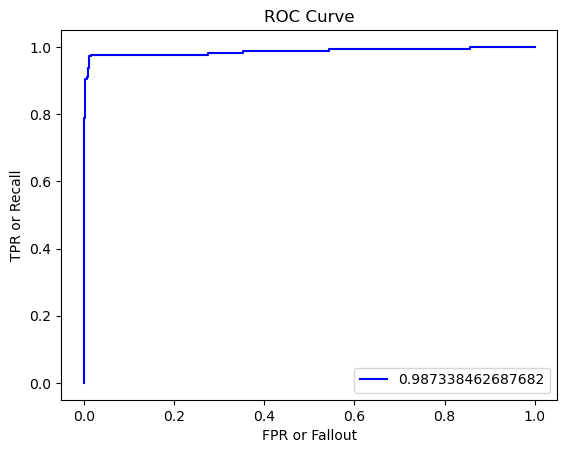

In [54]:
plt.title('ROC Curve')
plt.plot(fpr,tpr,'b',label=area)
plt.legend(loc='lower right')
plt.xlabel('FPR or Fallout')
plt.ylabel('TPR or Recall')
plt.show()